# 7.2 Анализ остатков

In [38]:
import scipy.stats as sps
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

price = beta0 + beta1 * year + beta2 * mileage + beta3 * auto + eps

In [4]:
data = pd.read_csv('https://stepik.org/media/attachments/lesson/26278/car_regr.txt', sep='\t')
data

,price,year,mileage,auto
0,250,2010,67.0,MT
1,365,2013,59.0,MT
2,365,2013,59.0,MT
3,250,2009,95.0,MT
4,310,2011,76.5,MT
5,125,2007,203.0,MT
6,150,2006,146.0,MT
7,225,2008,83.0,MT
8,269,2013,71.0,MT
9,250,2010,175.0,MT


In [95]:
price = np.array(data['price']).reshape(-1, 1)
year = np.array(data['year'])
mileage = np.array(data['mileage'])
z = np.array(np.where(data['auto'] == "AT", 0, 1))
n = len(data)
k = 3

In [35]:
linreg = LinearRegression()
y = price
X = pd.DataFrame({'year': year, 'mileage': mileage, 'z': z})
linreg.fit(y=price, X=X)

LinearRegression()

beta

In [89]:
beta0 = linreg.intercept_
beta1 = linreg.coef_[0][0]
beta2 = linreg.coef_[0][1]
beta3 = linreg.coef_[0][2]

Найдите диагональный элемент матрицы A^T*A, участвующий в построении доверительного интервала для параметра beta1

In [64]:
A = np.matrix(pd.DataFrame({'1': np.ones(n),'year': year, 'mileage': mileage, 'z': z}))
A

matrix([[1.000e+00, 2.010e+03, 6.700e+01, 1.000e+00],
        [1.000e+00, 2.013e+03, 5.900e+01, 1.000e+00],
        [1.000e+00, 2.013e+03, 5.900e+01, 1.000e+00],
        [1.000e+00, 2.009e+03, 9.500e+01, 1.000e+00],
        [1.000e+00, 2.011e+03, 7.650e+01, 1.000e+00],
        [1.000e+00, 2.007e+03, 2.030e+02, 1.000e+00],
        [1.000e+00, 2.006e+03, 1.460e+02, 1.000e+00],
        [1.000e+00, 2.008e+03, 8.300e+01, 1.000e+00],
        [1.000e+00, 2.013e+03, 7.100e+01, 1.000e+00],
        [1.000e+00, 2.010e+03, 1.750e+02, 1.000e+00],
        [1.000e+00, 2.014e+03, 2.100e+01, 1.000e+00],
        [1.000e+00, 2.008e+03, 1.400e+02, 1.000e+00],
        [1.000e+00, 2.006e+03, 1.460e+02, 1.000e+00],
        [1.000e+00, 2.011e+03, 9.300e+01, 1.000e+00],
        [1.000e+00, 2.009e+03, 7.500e+01, 1.000e+00],
        [1.000e+00, 2.006e+03, 1.870e+02, 1.000e+00],
        [1.000e+00, 2.015e+03, 5.200e+01, 0.000e+00],
        [1.000e+00, 2.006e+03, 1.550e+02, 1.000e+00],
        [1.000e+00, 2.013e+0

In [65]:
AT = A.transpose()
AT

matrix([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
         1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
         1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
         1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
         1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
         1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
         1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
         1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
         1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
        [2.010e+03, 2.013e+03, 2.013e+03, 2.009e+03, 2.011e+03,
         2.007e+03, 2.006e+03, 2.008e+03, 2.013e+03, 2.010e+03,
         2.014e+03, 2.008e+03, 2.006e+03, 2.011e+03, 2.009e+03,
         2.006e+03, 2.015e+03, 2.006e+03, 2.013e+03, 2.008e+03,
         2.010e+03, 2.006e+03, 2.009e+03, 2.013e+03, 2.011e+03,
         2.006e+03, 2.010e+03, 2.007e+03, 2.011e+03, 2.008e+03,
         2.008e+03, 2.011e+03, 2.006e+03, 2.012e+0

In [72]:
np.linalg.pinv(np.dot(AT, A))[1,1]

0.006929531942185722

Найдите точность 95% доверительного интервала для beta2

In [115]:
rss = sum(map(lambda x: (x[0] - (beta0 + beta1*x[1] + beta2*x[2] + beta3*x[3]))**2, zip(price,  X['year'], X['mileage'], X['z'])))
S2 = rss[0]/(n - k - 1)
S = np.sqrt(S2)
S

46.794094275254565

In [116]:
alpha = 0.05
sps.t.ppf(1-alpha/2, n-k-1)*S*np.sqrt(np.linalg.pinv(np.dot(AT, A))[2,2])

0.47252787998274803

Найдите коэффициент детерминации и проверьте значимость модели. 

In [125]:
x = np.average(price)
R2 = (1 - rss/sum(map(lambda pr: (pr - x)**2, price))[0])[0]
R2

0.7456943477859312

Найдите значение стандартизованного остатка, соответствующего  2му наблюдению

In [172]:
e2 = price[1] - (beta0 + beta1*year[1] + beta2*mileage[1] + beta3*z[1])
h22 = np.dot(np.dot(A,np.linalg.pinv(np.dot(AT,A))),AT)
# 0.07123567

matrix([[ 0.03540389,  0.02829404,  0.02829404, ..., -0.00513548,
          0.01752804, -0.00171644],
        [ 0.02829404,  0.07123567,  0.07123567, ..., -0.01376964,
         -0.01014444, -0.00192752],
        [ 0.02829404,  0.07123567,  0.07123567, ..., -0.01376964,
         -0.01014444, -0.00192752],
        ...,
        [-0.00513548, -0.01376964, -0.01376964, ...,  0.20611358,
          0.19489069,  0.20130578],
        [ 0.01752804, -0.01014444, -0.01014444, ...,  0.19489069,
          0.23642198,  0.19740373],
        [-0.00171644, -0.00192752, -0.00192752, ...,  0.20130578,
          0.19740373,  0.20034935]])

In [176]:
d2 = e2/(S*np.sqrt(1-0.07123567))
d2

array([1.2373635])

Какие из основных предположений  об ошибках наблюдений нарушены?
Воспользуйтесь графическим анализом, чтобы ответить на поставленный вопрос

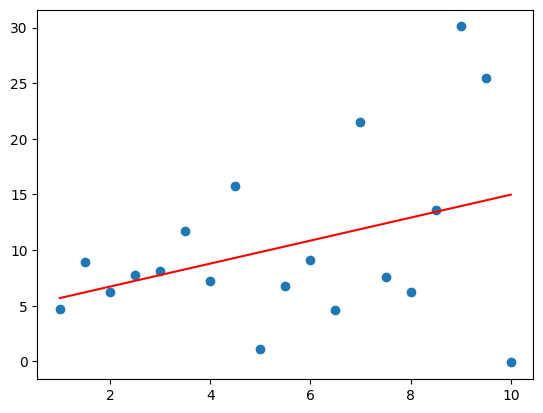

In [195]:
from sklearn.linear_model import LinearRegression
X = np.arange(1.0, 10.1, 0.5).reshape(-1, 1)
Y = np.array([4.7, 8.9, 6.2, 7.8, 8.1, 11.7, 7.2, 15.8, 1.1, 6.8, 9.1, 4.6, 21.5, 7.6, 6.2, 13.6, 30.1, 25.5, -0.1])
linreg1 = LinearRegression()
linreg1.fit(y=Y, X=X)
y_pred = linreg1.predict(X)
plt.scatter(y=Y, x=X)
plt.plot(X, y_pred, 'r')
plt.show()